#### Importing Required Libraries

In [160]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [166]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [161]:
num_bandit = 2000 #number of bandit problems
k = 10 #number of arms in each bandit problem
num_pulls = 1000 #number we pull each arm in each problem

#### Recall to np.random.normal() parameters
##### random.normal(loc=0.0, scale=1.0, size=None)

In [162]:
arr_size = (num_bandit, k) #defining the array size we want to use in next step
q_true = np.random.normal(loc = 0, scale = 1, size=(num_bandit, k)) #drawing samples from a normal(Gaussian) distribution to generate true values q*(a) for each arm.
q_true

array([[-2.01205748, -0.78173387,  1.5264675 , ...,  0.97973332,
         1.4768861 ,  0.42731965],
       [-0.93272945,  1.01954065, -0.91688189, ..., -0.00998328,
        -0.728172  ,  0.80604932],
       [ 0.68744337,  0.14670317, -0.9047779 , ..., -0.01104666,
         0.40640586, -0.45557894],
       ...,
       [ 1.36917046, -0.80062294,  0.87489091, ..., -1.69873157,
         0.3215767 ,  0.88385827],
       [ 0.09822989,  0.75974206,  0.57792772, ...,  1.02466849,
         0.69687084,  0.12057743],
       [ 0.78250731, -0.49540323,  0.29910887, ..., -0.03610345,
        -0.68270294, -1.36586056]])

#### Recall to np.argmax() parameters
##### numpy.argmax(a, axis=None, out=None, *, keepdims=<no value>)

In [163]:
true_optim_arms = np.argmax(a = q_true, axis = 1) # this will return the optimal arm in each bandit problem.
true_optim_arms

# each number in the array below represents a bandit problem and its optimal arm.

array([2, 1, 0, ..., 0, 7, 4], dtype=int64)

#### Defining Epsilon Values and Colors

In [164]:
epsilon_values = [0, 0.1, 0.01, 0.2, 0.02, 1] # different values to compare
colors = ['red', 'blue', 'green', 'yellow', 'magenta', 'cyan'] # each epsilon has a color

#### Recall to plt.figure.add_subplot()
##### add_subplot(*args, **kwargs) => *args : int, (int, int, index), or SubplotSpec, default: (1, 1, 1)

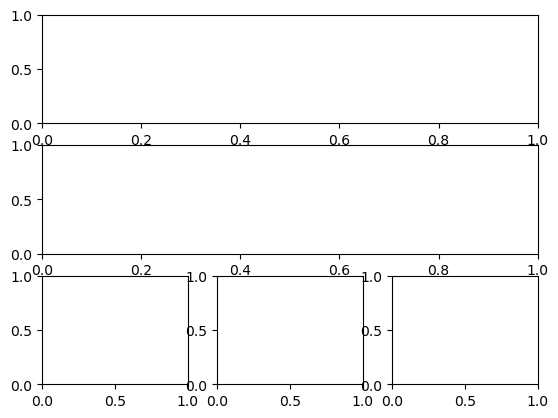

In [167]:
# practice examples from documentation
fig = plt.figure()
gs0 = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs0[0])
ax2 = fig.add_subplot(gs0[1])
gssub = gs0[2].subgridspec(1, 3)
for i in range(3):
    fig.add_subplot(gssub[0, i])

Current Epsilon :  0 0
Current Epsilon :  1 0.1
Current Epsilon :  2 0.01
Current Epsilon :  3 0.2
Current Epsilon :  4 0.02
Current Epsilon :  5 1


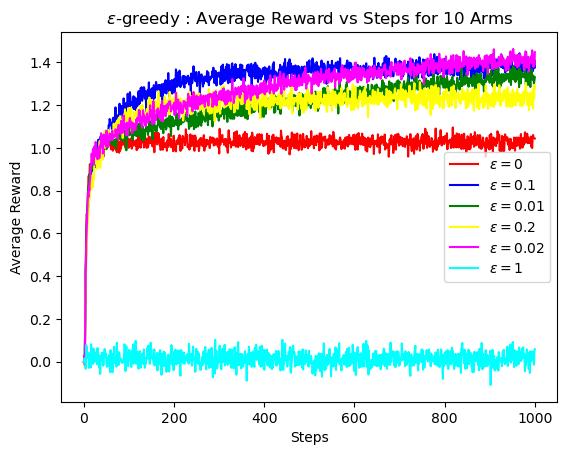

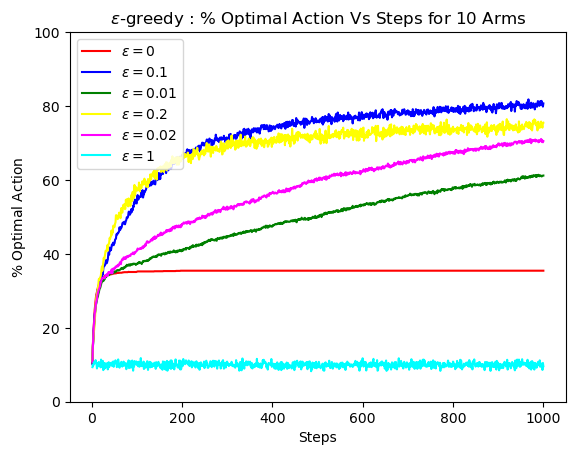

In [236]:
fig1 = plt.figure().add_subplot(1,1,1, facecolor = 'white')
fig2 = plt.figure().add_subplot(1,1,1, facecolor = 'white')
for epsilon in range(len(epsilon_values)):
    print('Current Epsilon : ',epsilon,epsilon_values[epsilon]) # Printing current epsilon on each for
    Q = np.zeros((num_bandit, k)) # (num_bandit = 2000, k = 10) np array of zeroes to store estimated rewards Q
    N = np.zeros((num_bandit, k)) # (num_bandit = 2000, k = 10) np array of zeroes to store the number of times each arm is selected, pulled
    
    Qi = np.random.normal(q_true, 1) # pulling each arm once to initialize the bandit
    
    R_eps = []
    R_eps.append(0) # first reward is set to 0
    R_eps.append(np.mean(Qi)) # second is the mean of first pull for the arms
    R_eps_opt = []
    
    for pull in range(2, num_pulls+1):
        R_pull = []
        opt_arm_pull = 0 # number the algorithm selects the best arm
        for i in range(num_bandit):
            if random.random()<epsilon_values[epsilon]: # creating a random number to see whether we want to explore or exploit(greedy action)
                j = np.random.randint(k)
            else:
                j = np.argmax(Q[i])
            if j==true_optim_arms[i]:
                opt_arm_pull = opt_arm_pull+1
            
            R_temp = np.random.normal(q_true[i][j], 1) # select ith bandit and the arm and save it to R_temp
            R_pull.append(R_temp) # append R_temp value to R_pull
            N[i][j] = N[i][j]+1 # increase the number of the arm pulled in current bandit
            Q[i][j] = Q[i][j]+(R_temp - Q[i][j])/N[i][j] # update the reward Q => New Estimated = Old Estimate + (Reward / Number of Pull)
        
        avg_R_pull = np.mean(R_pull) # obtaining the average reward
        R_eps.append(avg_R_pull) # saving the average Reward for each epsilon
        R_eps_opt.append(float(opt_arm_pull)*100/2000)
    fig1.plot(range(0, num_pulls+1), R_eps, colors[epsilon])
    fig2.plot(range(2, num_pulls+1), R_eps_opt, colors[epsilon])
# figure customization for better view and understanding
fig1.title.set_text(r'$\epsilon$-greedy : Average Reward vs Steps for 10 Arms')
fig1.set_ylabel('Average Reward')
fig1.set_xlabel('Steps')
fig1.legend((r"$\epsilon=$"+str(epsilon_values[0]),r"$\epsilon=$"+str(epsilon_values[1]),r"$\epsilon=$"+str(epsilon_values[2]),r"$\epsilon=$"+str(epsilon_values[3]),r"$\epsilon=$"+str(epsilon_values[4]), r"$\epsilon=$"+str(epsilon_values[5])),loc='best')
fig2.title.set_text(r'$\epsilon$-greedy : $\%$ Optimal Action Vs Steps for 10 Arms')
fig2.set_ylabel(r'$\%$ Optimal Action')
fig2.set_xlabel('Steps')
fig2.set_ylim(0,100)
fig2.legend((r"$\epsilon=$"+str(epsilon_values[0]),r"$\epsilon=$"+str(epsilon_values[1]),r"$\epsilon=$"+str(epsilon_values[2]),r"$\epsilon=$"+str(epsilon_values[3]),r"$\epsilon=$"+str(epsilon_values[4]), r"$\epsilon=$"+str(epsilon_values[5])),loc='best')
plt.show()